# Sono, Uso do Celular e Cansaço Diário — Uma Análise Exploratória

## Contexto e objetivo da análise

Este notebook apresenta uma análise exploratória de um conjunto de dados de pequeno porte, com o objetivo de investigar possíveis relações entre variáveis relacionadas ao uso do telefone e métricas de alcance.

Por se tratar de uma base reduzida, a análise tem caráter exploratório, buscando identificar padrões iniciais e gerar hipóteses que possam ser aprofundadas futuramente com dados mais robustos.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", palette="colorblind")

## Principais conclusões (resumo)

- A percepção de ter dormido o suficiente está fortemente associada a menores níveis de cansaço diário.
- Variáveis relacionadas ao uso do celular apresentaram associações fracas e inconsistentes com cansaço elevado.
- Medidas comportamentais binárias mostraram-se pouco sensíveis para capturar efeitos sutis sobre o bem-estar.

## Fonte dos dados e carregamento

In [3]:
df = pd.read_csv("../data/SleepStudyData.csv")
df.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes


## Estrutura e características do conjunto de dados

Inicialmente, analisei a estrutura do conjunto de dados, observando o número de linhas, colunas, tipos das variáveis e a presença de valores ausentes. Essa etapa é fundamental para compreender as limitações da base e orientar as análises subsequentes.


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Enough      104 non-null    str    
 1   Hours       102 non-null    float64
 2   PhoneReach  104 non-null    str    
 3   PhoneTime   104 non-null    str    
 4   Tired       104 non-null    int64  
 5   Breakfast   104 non-null    str    
dtypes: float64(1), int64(1), str(4)
memory usage: 5.0 KB


A base contém 104 observações e 6 variáveis. A maioria das colunas é categórica, enquanto as variáveis `Hours` (horas de sono) e `Tired` (nível de cansaço) são numéricas.

Nota-se a presença de valores ausentes na variável `Hours`, o que deve ser considerado nas análises que envolvem essa medida.

In [5]:
df.describe()

,Hours,Tired
count,102.000000,104.000000
mean,6.656863,3.076923
std,1.417676,1.011510
min,2.000000,1.000000
25%,6.000000,2.000000
50%,7.000000,3.000000
75%,7.000000,4.000000
max,10.000000,5.000000


A análise descritiva indica que o número médio de horas de sono é de aproximadamente 6,66 horas, com valores variando entre 2 e 10 horas. Já o nível médio de cansaço reportado é de cerca de 3, em uma escala que varia de 1 a 5.

Esses valores sugerem uma amostra com variação considerável tanto nos hábitos de sono quanto na percepção de fadiga, o que justifica a exploração de possíveis relações entre essas variáveis.

## Definição das variáveis e estrutura analítica

Para orientar a análise exploratória, as variáveis do conjunto de dados foram organizadas de acordo com seu papel analítico no estudo.

- **Variável de interesse (proxy de bem-estar):**
  - `Tired`: representa o nível subjetivo de cansaço diário, sendo utilizada como uma aproximação do bem-estar do indivíduo.

- **Variáveis relacionadas ao sono:**
  - `Enough`: indica se o indivíduo percebe que dormiu o suficiente.
  - `Hours`: número de horas dormidas.

- **Variáveis comportamentais:**
  - `PhoneReach`: indica se o telefone esteve ao alcance durante o período analisado.
  - `PhoneTime`: indica o uso do telefone.
  - `Breakfast`: indica se o indivíduo tomou café da manhã.

Essa organização auxilia na interpretação dos resultados, especialmente ao analisar como hábitos de sono e comportamento podem estar associados ao nível de cansaço reportado.

## Relações entre sono, uso do celular e cansaço diário

Nesta etapa, é realizada uma exploração descritiva das variáveis do conjunto de dados, com o objetivo de compreender suas distribuições e identificar padrões iniciais. Os resultados apresentados têm caráter exploratório e não permitem inferências causais.

Inicialmente, analisei a distribuição das variáveis categóricas para compreender o perfil geral da amostra e a frequência das respostas observadas.

In [6]:
df["Enough"].value_counts()

Enough
No     68
Yes    36
Name: count, dtype: int64

In [7]:
df["PhoneReach"].value_counts()

PhoneReach
Yes    72
No     32
Name: count, dtype: int64

In [8]:
df["PhoneTime"].value_counts()

PhoneTime
Yes    84
No     20
Name: count, dtype: int64

In [9]:
df["Breakfast"].value_counts()

Breakfast
Yes    63
No     41
Name: count, dtype: int64

Observa-se que a maioria dos indivíduos relata não dormir o suficiente, enquanto uma parcela significativa mantém o telefone ao alcance e faz uso do dispositivo. A variável `Breakfast` apresenta uma distribuição mais equilibrada entre as categorias.

Esses resultados ajudam a contextualizar o comportamento médio da amostra antes da análise das relações entre as variáveis.

Em seguida, analisei a distribuição do nível de cansaço diário, variável central desta análise.

In [10]:
df["Tired"].value_counts()

Tired
3    40
2    27
4    23
5    10
1     4
Name: count, dtype: int64

Observa-se que os níveis intermediários de cansaço são os mais frequentes na amostra, enquanto os níveis extremos aparecem com menor frequência. Isso sugere uma distribuição concentrada em valores médios de fadiga percebida.

### Sono percebido e níveis de cansaço

In [11]:
pd.crosstab(df["Enough"], df["Tired"])

Tired,1,2,3,4,5
Enough,,,,,
No,0,12,28,18,10
Yes,4,15,12,5,0


In [12]:
pd.crosstab(df["Enough"], df["Tired"], normalize="index")

Tired,1,2,3,4,5
Enough,,,,,
No,0.000000,0.176471,0.411765,0.264706,0.147059
Yes,0.111111,0.416667,0.333333,0.138889,0.000000


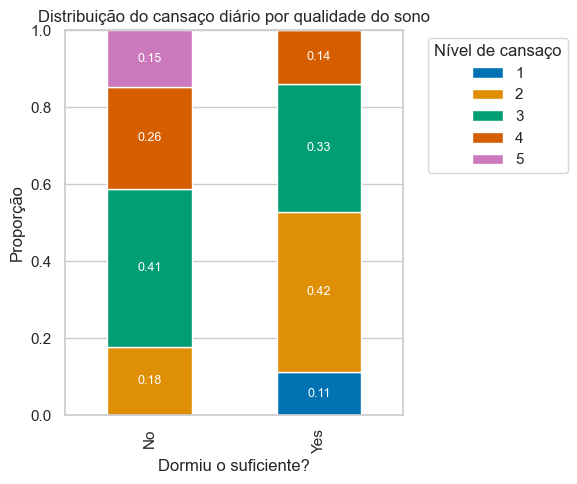

In [13]:
# Crosstab normalizado por linha
ct = pd.crosstab(
    df["Enough"],
    df["Tired"],
    normalize="index"
)

# Plot
ax = ct.plot(
    kind="bar",
    stacked=True,
    figsize=(6, 5)
)

# Títulos e rótulos
ax.set_title("Distribuição do cansaço diário por qualidade do sono")
ax.set_xlabel("Dormiu o suficiente?")
ax.set_ylabel("Proporção")
ax.legend(title="Nível de cansaço", bbox_to_anchor=(1.05, 1), loc="upper left")

# Rótulos dentro das barras (ignorando zeros)
for container in ax.containers:
    labels = [
        f"{v:.2f}" if v > 0 else ""
        for v in container.datavalues
    ]
    ax.bar_label(
        container,
        labels=labels,
        label_type="center",
        color="white",
        fontsize=9
    )

plt.tight_layout()
plt.show()


Ao analisar a relação entre a percepção de ter dormido o suficiente e o nível de cansaço diário, observa-se que indivíduos que relatam não dormir o suficiente apresentam maior concentração nos níveis mais elevados de cansaço (4 e 5). Em contraste, aqueles que relatam dormir o suficiente tendem a se concentrar nos níveis mais baixos e intermediários de cansaço.

Esse padrão sugere uma associação consistente entre a qualidade percebida do sono e o bem-estar diário, ainda que os resultados devam ser interpretados com cautela devido ao caráter exploratório da análise.

Para complementar a visualização anterior, analisamos o nível médio de cansaço diário em função da percepção de sono suficiente.

Observa-se que indivíduos que relatam não dormir o suficiente apresentam, em média, níveis mais elevados de cansaço quando comparados àqueles que relatam dormir o suficiente. Essa diferença reforça o padrão identificado visualmente e sugere uma associação consistente entre qualidade percebida do sono e bem-estar diário.

In [14]:
df.groupby("Enough")["Tired"].mean()

Enough
No     3.382353
Yes    2.500000
Name: Tired, dtype: float64

In [15]:
pd.crosstab(df["Tired"], df["Enough"], normalize="index")

Enough,No,Yes
Tired,,
1,0.000000,1.000000
2,0.444444,0.555556
3,0.700000,0.300000
4,0.782609,0.217391
5,1.000000,0.000000


Ao observar a distribuição do nível de cansaço condicionada à percepção de sono suficiente, nota-se que, à medida que o nível de cansaço aumenta, cresce a proporção de indivíduos que relatam não ter dormido o suficiente.

Em especial, os níveis mais elevados de cansaço concentram-se majoritariamente entre aqueles que percebem o sono como insuficiente, enquanto os níveis mais baixos apresentam maior proporção de indivíduos satisfeitos com o sono.

### Uso do celular e percepção da qualidade do sono

In [29]:
df["PhoneTime"].value_counts(normalize=True)

PhoneTime
Yes    0.807692
No     0.192308
Name: proportion, dtype: float64

In [16]:
df["PhoneReach"].value_counts(normalize=True)

PhoneReach
Yes    0.692308
No     0.307692
Name: proportion, dtype: float64

Antes de analisar associações entre o uso do celular e variáveis de sono, é importante contextualizar a prevalência desses comportamentos na amostra.

Observa-se que a grande maioria dos participantes relata utilizar o celular antes de dormir, assim como manter o aparelho ao alcance. Essa alta prevalência indica baixa variabilidade nessas medidas, o que pode limitar sua capacidade de discriminar diferenças no bem-estar entre os grupos.

In [18]:
pd.crosstab(
    df["PhoneReach"],
    df["Enough"],
    normalize="index"
)

Enough,No,Yes
PhoneReach,,
No,0.593750,0.406250
Yes,0.680556,0.319444


In [20]:
pd.crosstab(
    df["PhoneTime"],
    df["Enough"],
    normalize="index"
)

Enough,No,Yes
PhoneTime,,
No,0.650000,0.350000
Yes,0.654762,0.345238


Ao analisar a relação entre o uso do celular e a percepção de sono suficiente, observa-se que tanto o uso do celular antes de dormir quanto a presença do aparelho ao alcance estão associados a uma maior proporção de relatos de sono insuficiente.

Entretanto, as diferenças observadas entre os grupos são relativamente pequenas, sugerindo que, embora exista uma associação, ela não é forte o suficiente para explicar, de forma isolada, variações relevantes na percepção da qualidade do sono.

### Uso do celular e cansaço elevado

In [26]:
df["HighTired"] = df["Tired"] >= 4

Com o objetivo de simplificar a análise e focar em níveis mais críticos de fadiga, o nível de cansaço diário foi transformado em uma variável binária. Considerou-se como cansaço elevado os níveis 4 e 5 da escala original.

Essa abordagem permite avaliar de forma mais direta a associação entre comportamentos e a probabilidade de cansaço mais intenso.

In [27]:
pd.crosstab(
    df["PhoneTime"],
    df["HighTired"],
    normalize="index"
)

HighTired,False,True
PhoneTime,,
No,0.650000,0.350000
Yes,0.690476,0.309524


In [28]:
pd.crosstab(
    df["PhoneReach"],
    df["HighTired"],
    normalize="index"
)

HighTired,False,True
PhoneReach,,
No,0.593750,0.406250
Yes,0.722222,0.277778


Ao analisar a associação entre o uso do celular e a probabilidade de cansaço elevado, observa-se que o uso do celular antes de dormir (`PhoneTime`) não está associado a um aumento na proporção de indivíduos com cansaço elevado.

Por outro lado, a variável `PhoneReach` apresenta um padrão distinto, com menor proporção de cansaço elevado entre aqueles que mantêm o celular ao alcance. Esse resultado, contrário à expectativa inicial, sugere a possível influência de fatores comportamentais ou contextuais não observados, reforçando o caráter exploratório da análise.

## Principais achados da análise exploratória

A análise exploratória indicou uma associação consistente entre a percepção de ter dormido o suficiente (`Enough`) e o nível de cansaço diário (`Tired`). Indivíduos que relatam sono insuficiente apresentam, em média, níveis mais elevados de cansaço, além de maior concentração nos níveis mais altos da escala de fadiga. Esse padrão se manteve tanto na análise completa da variável `Tired` quanto após a sua transformação em uma medida binária de cansaço elevado.

Em contraste, as variáveis comportamentais relacionadas ao uso do celular apresentaram associações mais fracas e menos consistentes. Embora o uso do celular antes de dormir (`PhoneTime`) e a presença do aparelho ao alcance (`PhoneReach`) estejam associados a uma maior proporção de relatos de sono insuficiente, essas variáveis não demonstraram uma relação clara com a ocorrência de cansaço elevado.

Esses resultados sugerem que a qualidade percebida do sono desempenha um papel mais relevante no bem-estar diário do que as medidas simplificadas de uso do celular disponíveis no conjunto de dados. Além disso, a elevada prevalência do uso do celular na amostra e a natureza binária dessas variáveis podem limitar sua capacidade de capturar efeitos mais sutis sobre a fadiga.

De forma geral, os achados reforçam o caráter exploratório da análise e indicam que investigações futuras se beneficiariam de dados mais granulares sobre hábitos de sono e uso do celular, bem como de medidas adicionais de contexto e comportamento.

## Conclusões, limitações e próximos passos

Este estudo exploratório investigou a relação entre hábitos de sono, uso do celular e níveis de cansaço diário a partir de um conjunto de dados de pequeno porte. Os resultados indicam que a percepção de ter dormido o suficiente está consistentemente associada a menores níveis de cansaço, destacando a importância da qualidade percebida do sono para o bem-estar diário.

Por outro lado, as variáveis relacionadas ao uso do celular apresentaram associações mais fracas e menos consistentes com o cansaço elevado. Embora o uso do celular e a presença do aparelho ao alcance estejam associados a uma maior frequência de relatos de sono insuficiente, essas medidas não se mostraram suficientes para explicar diferenças relevantes nos níveis mais elevados de fadiga. Esses achados sugerem que o impacto do uso do celular sobre o cansaço pode depender de fatores adicionais não capturados neste conjunto de dados.

Entre as principais limitações da análise estão o tamanho reduzido da amostra, a natureza auto-reportada das variáveis e a utilização de medidas comportamentais binárias, que podem não refletir adequadamente a intensidade ou o contexto do uso do celular. Além disso, a análise exploratória não permite inferências causais sobre as relações observadas.

Como próximos passos, estudos futuros poderiam incorporar dados mais detalhados sobre duração e qualidade do sono, intensidade e tipo de uso do celular, bem como informações contextuais adicionais. A ampliação da amostra e o uso de métodos analíticos mais robustos permitiriam testar de forma mais conclusiva as hipóteses levantadas neste trabalho.